In [1]:
import os

# Set the PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT environment variable to 0.6 seconds
# os.environ['PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT'] = '0.7'

import torch
import matplotlib.pyplot as plt
import networkx as nx
import collections

from copy import deepcopy

# local
import optimization_utils as ou

import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')


from datasets.import_dataset import import_dataset
from trainer import Trainer
from utils.plotting import *
from utils import utils
from utils import utils_pyg as up
import datasets.simulations as sim
import link_prediction as lp





device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device = {device}')


%load_ext autoreload
%autoreload 2

device = cuda


In [ ]:
# densification for link prediction: take a subgraph that is not
# link prediction: i know some of the nodes and a bunch is dyads on which i need to predict. so take a subgraph 
# so do a densification on all of the edges you have and omitted dyads are the same

#densification. need to do a special densification here. separate between 1 and 0 after the dyads were omitted. so the dyads omittion needs to happen before the densification which makes everything ugly. why does the dyads omittion happen when it does? i think that the m


# Grid search params


## VANILLA

### photo bigclam

In [7]:

dim_feats = [76, 80, 86, 90, 96, 100, 106, 110, 116]
# dim_feats = [24]
l1_regs = [1]
# l1_regs = [0.0, 0.01, 0.1, 1, 10]
# s_regs = [10, 1, 0.1, 0.01, 0.0]
s_regs = [0.0]
n_iters = [4000]
lr_feats = [3e-6]

range_triplets = [
    ['clamiter_init', 'dim_feat', dim_feats],
    ['clamiter_init','s_reg', s_regs],
    ['clamiter_init','l1_reg', l1_regs],
    ['feat_opt','n_iter', n_iters],
    ['feat_opt','lr', lr_feats]
]
#todo: how to default without the range triplets? if i just want to make optimization for many iterations on the mighty or the specialized?

#todo: why is the l1 reg not working
# Create the file if it doesn't exist
ds_name = 'photo'
model_name = 'bigclam'
global_config_base = True
densify = False
attr_opt = False
test_p = 0.1
val_p = 0.0

ou.cross_val_link(
    ds_name,
    model_name=model_name,
    range_triplets=range_triplets,
    global_config_base=global_config_base,
    densify=densify,
    attr_opt=attr_opt,
    test_p=test_p,
    val_p=val_p,
    device=device,
    n_reps=10
    )

#todo: maybe try to optimize with small learning rate at the beginning? maybe the prior will just take care of it....
#todo: also use node attributes!! for sparse graphs they are important




/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 23:30:39 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 4000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.9754873787850513


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 23:31:08 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1

### photo iegam

In [8]:

dim_feats = [76, 80, 86, 90, 96, 100, 106, 110, 116]
# dim_feats = [24]
l1_regs = [1]
# l1_regs = [0.0, 0.01, 0.1, 1, 10]
# s_regs = [10, 1, 0.1, 0.01, 0.0]
s_regs = [0.0]
n_iters = [5000]
lr_feats = [3e-6]

range_triplets = [
    ['clamiter_init', 'dim_feat', dim_feats],
    ['clamiter_init','s_reg', s_regs],
    ['clamiter_init','l1_reg', l1_regs],
    ['feat_opt','n_iter', n_iters],
    ['feat_opt','lr', lr_feats]
]
#todo: how to default without the range triplets? if i just want to make optimization for many iterations on the mighty or the specialized?

#todo: why is the l1 reg not working
# Create the file if it doesn't exist
ds_name = 'photo'
model_name = 'iegam'
global_config_base = True
densify = False
attr_opt = False
test_p = 0.1
val_p = 0.0

ou.cross_val_link(
    ds_name,
    model_name=model_name,
    range_triplets=range_triplets,
    global_config_base=global_config_base,
    densify=densify,
    attr_opt=False,
    test_p=test_p,
    val_p=val_p,
    device=device,
    n_reps=10
    )

#todo: maybe try to optimize with small learning rate at the beginning? maybe the prior will just take care of it....
#todo: also use node attributes!! for sparse graphs they are important



#todo: make an option to name config files!!! 



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 01:10:37 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 5000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.9680562677163386


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 01:11:48 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "n

## priored



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:00:54 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 6,
        "scheduler_step_size": 1000,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_feats"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:541:::  
in fit,
first_func_in_fit='fit_feats'
second_function_name='fit_prior'


/home/user/Do

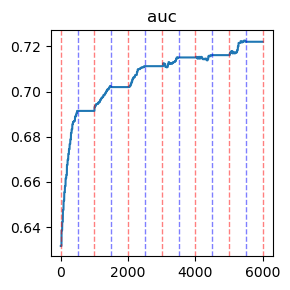



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.721995833504625


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:03:04 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

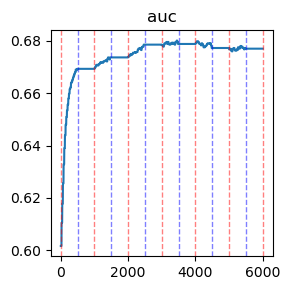



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6770318047276466


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:05:16 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

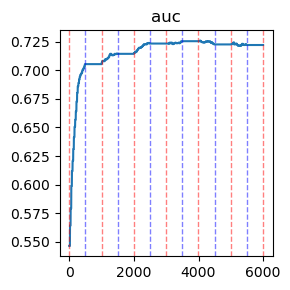



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7219958335046249


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:07:26 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

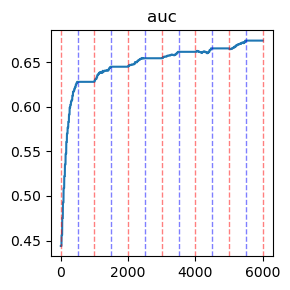



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6742054943473793


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:09:34 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

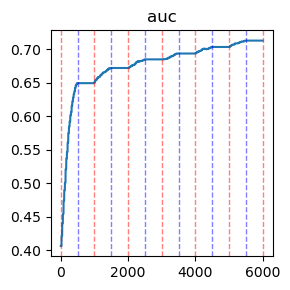



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7127460904419322


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:11:41 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

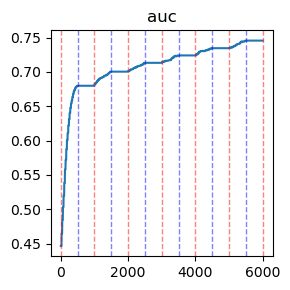



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7456340657759508


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:13:48 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

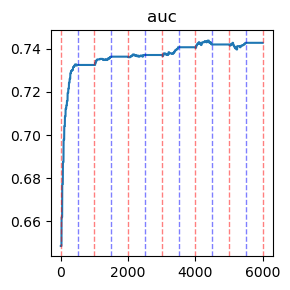



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7428077553956834


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:15:56 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

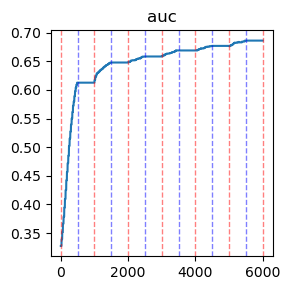



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6862815477903392


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:18:04 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

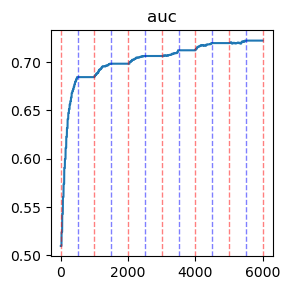



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.722252770811922


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:20:11 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

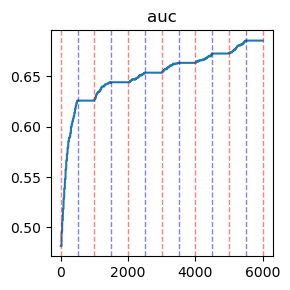



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6855107358684481


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:22:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

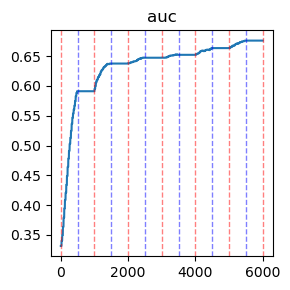



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6762609928057555


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:24:27 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

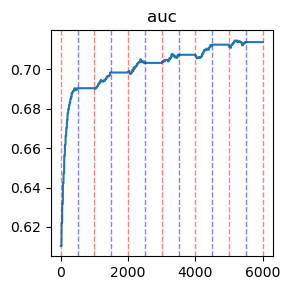



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7137738396711203


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:26:34 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

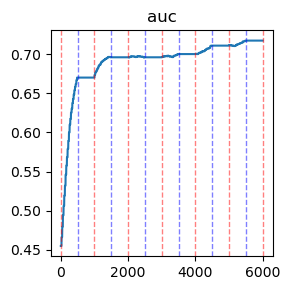



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7173709619732785


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:28:42 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

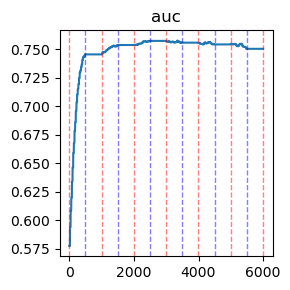



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7502589373072972


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:30:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

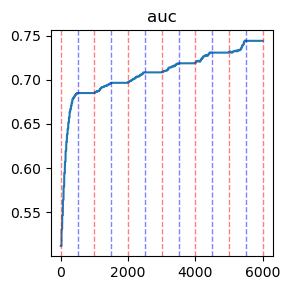



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7440924419321686


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:32:57 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

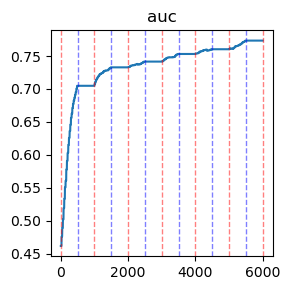



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7733832949640288


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:35:05 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

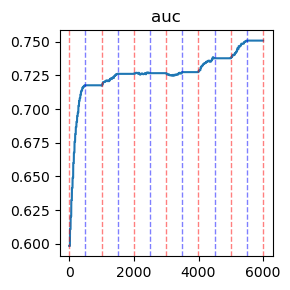



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7507728119218912


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:37:13 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

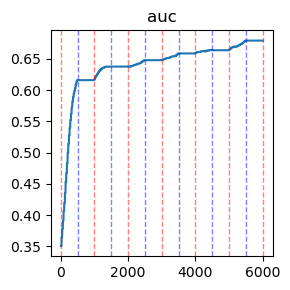



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6793442404933197


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:39:20 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

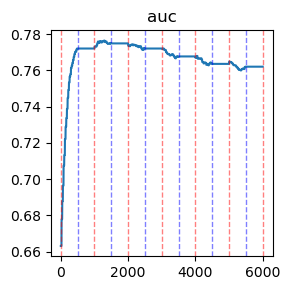



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.76207805344296


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:41:28 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_fo

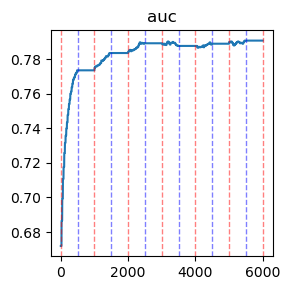



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7908550318602262


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:43:36 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

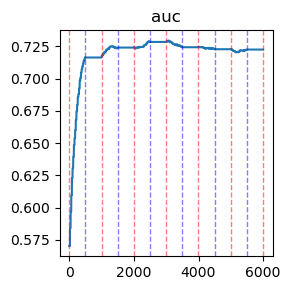



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7225097081192189


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:45:44 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

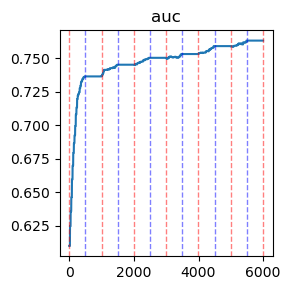



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.763105802672148


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:47:52 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

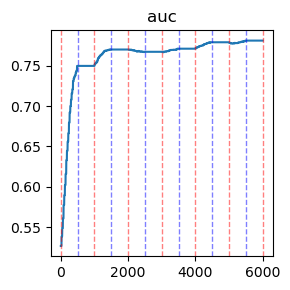



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7810914141829393


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:50:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

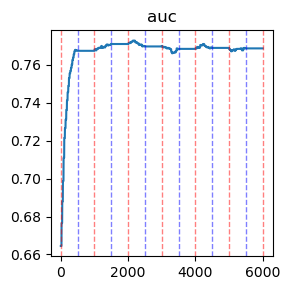



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7687584234326824


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:52:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

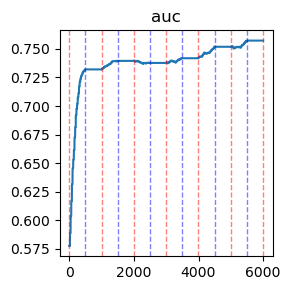



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7571962446043166


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:54:17 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

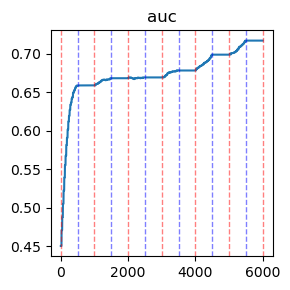



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7168570873586845


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:56:26 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

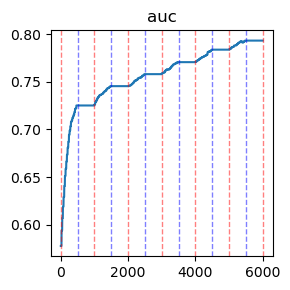



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7931674676258993


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:58:35 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

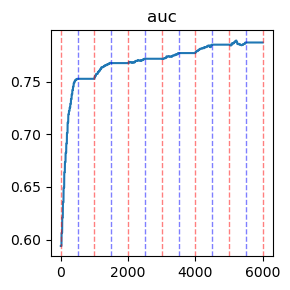



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7870009722507708


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:00:44 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

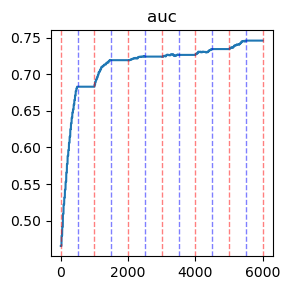



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7458910030832477


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:02:52 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

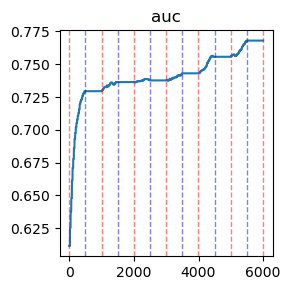



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7679876115107913


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:05:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

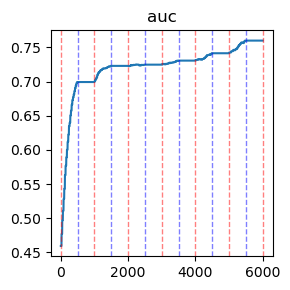



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7600225549845838


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:07:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

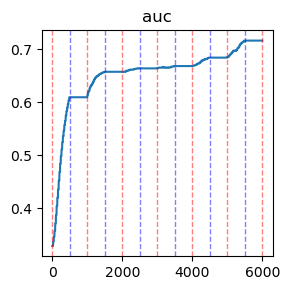



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7163432127440904


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:09:17 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

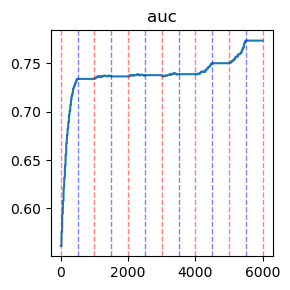



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7733832949640288


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:11:25 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

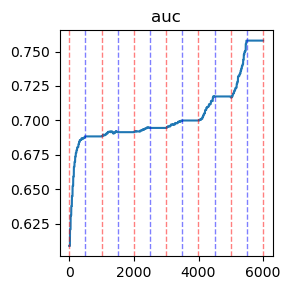



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7579670565262077


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:13:34 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

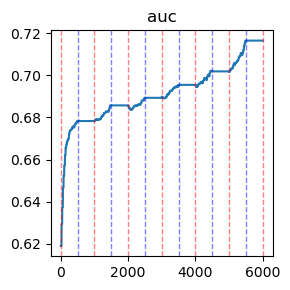



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7166001500513876


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:15:42 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

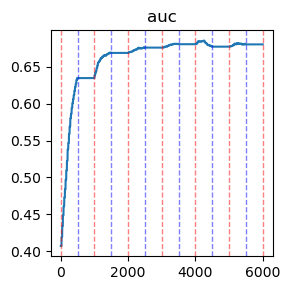



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6806289270298047


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:17:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

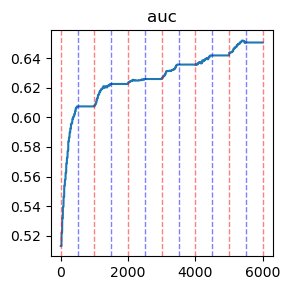



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6505672620760534


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:19:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

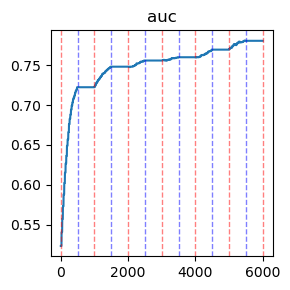



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7803206022610484


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:22:05 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

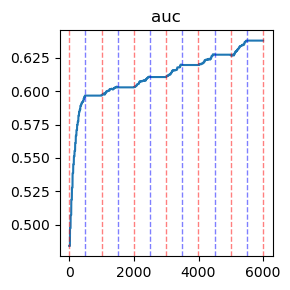



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6377203967112025


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:24:14 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

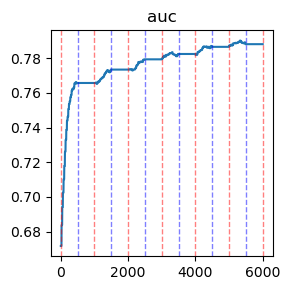



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7880287214799591


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:26:22 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

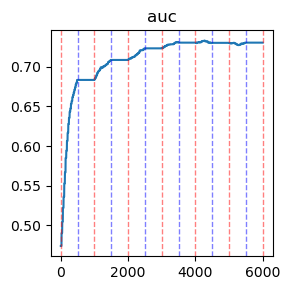



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7304747646454265


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:28:31 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

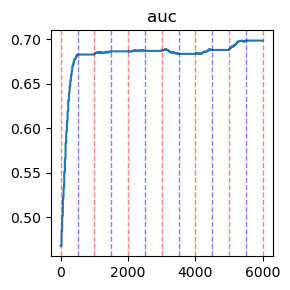



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.698357601233299


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:30:40 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

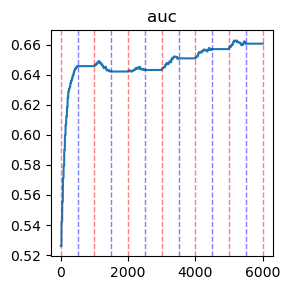



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6605878170606373


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:32:50 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

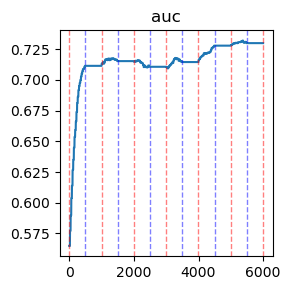



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7299608900308325


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:34:59 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

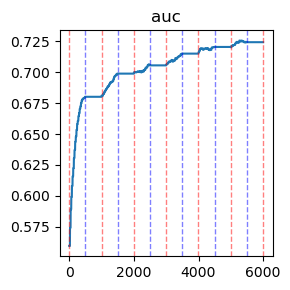



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7243082692702981


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:37:06 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

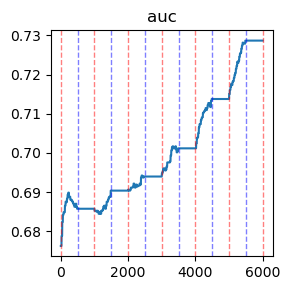



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7286762034943474


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:39:12 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

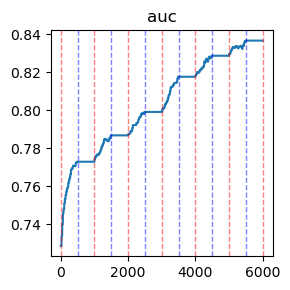



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8365898725590957


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:41:18 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

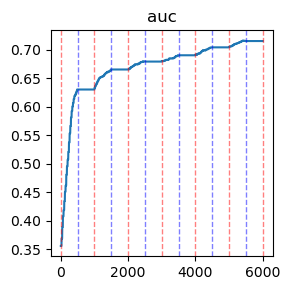



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7150585262076053


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:43:26 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

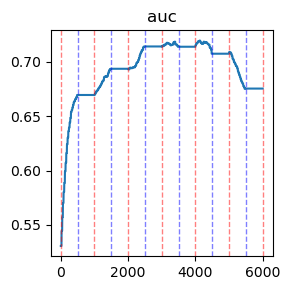



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6754901808838644


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:45:37 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

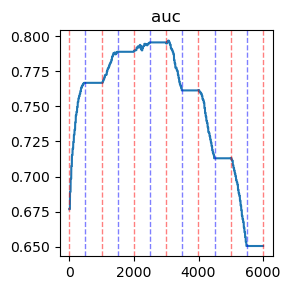



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6505672620760535


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:47:48 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

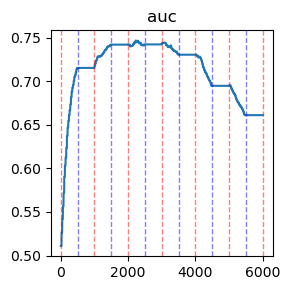



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6611016916752313


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:49:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

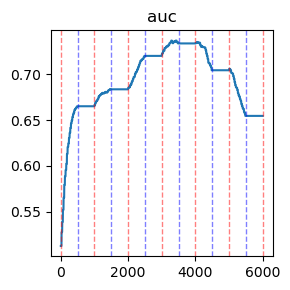



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6546782589928057


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:52:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

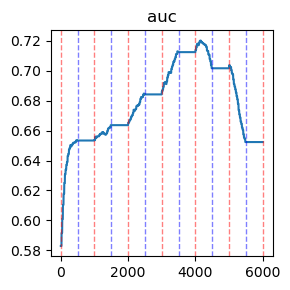



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6523658232271327


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:54:20 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

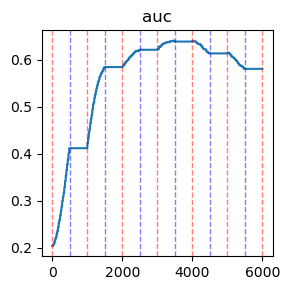



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5801664398766702


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:56:33 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

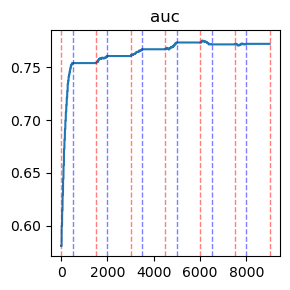



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7723555457348408


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:59:42 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

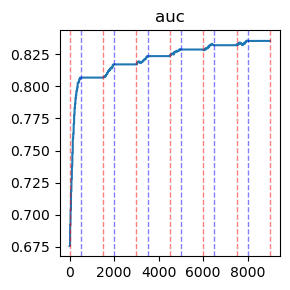



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8353051860226106


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:02:47 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

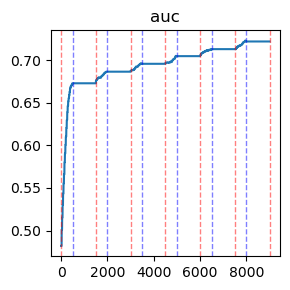



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7219958335046248


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:05:50 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

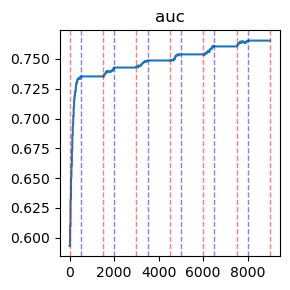



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7654182384378213


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:08:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

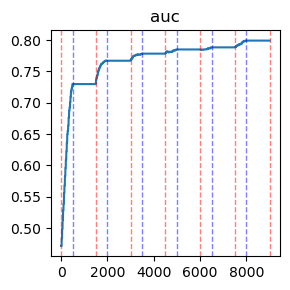



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7990770256937307


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:11:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

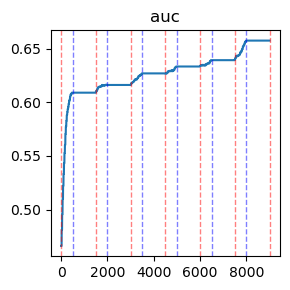



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6575045693730731


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:14:51 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

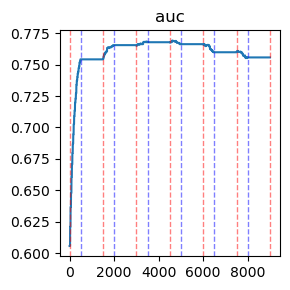



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7556546207605345


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:17:59 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

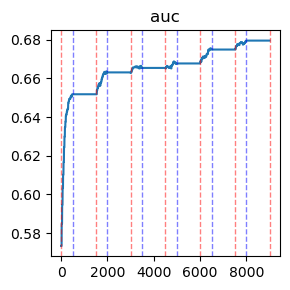



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6796011778006167


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:21:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

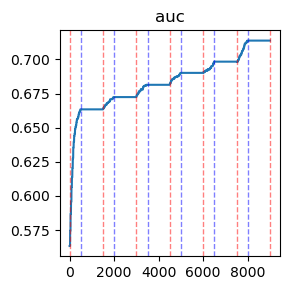



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7137738396711204


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:24:14 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

In [85]:

# dim_feats = [36, 40, 46, 50, 56, 60, 66, 70, 76, 80]
dim_feats = [24]
l1_regs = [1]
# l1_regs = [0.0, 0.01, 0.1, 1, 10]
# s_regs = [10, 1, 0.1, 0.01, 0.0]
s_regs = [0.0]
n_iters_feats = [500, 1000, 1300]
lr_feats = [3e-6, 5e-6]


n_iters_prior = [1000]
lr_prior = [3e-6]
noise_amps = [0.1]

scheduler_step_sizes = [1000]
n_back_forths = [15]

range_triplets = [
    ['clamiter_init', 'dim_feat', dim_feats],
    ['clamiter_init','s_reg', s_regs],
    ['clamiter_init','l1_reg', l1_regs],
    ['feat_opt','n_iter', n_iters_feats],
    ['feat_opt','lr', lr_feats],

    ['prior_opt','n_iter', n_iters_prior],
    ['prior_opt','lr', lr_prior],
    ['prior_opt','noise_amp', noise_amps],

    ['back_forth', 'scheduler_step_size', scheduler_step_sizes],
    ['back_forth', 'n_back_forth', n_back_forths]
]
#todo: how to default without the range triplets? if i just want to make optimization for many iterations on the mighty or the specialized?

#todo: why is the l1 reg not working
# Create the file if it doesn't exist
ds_name = 'photo'
model_name = 'piegam'
global_config_base = True
densify = False
attr_opt = False #! TRY WITHOUT ATTRIBUTES!!!!
test_p = 0.1
val_p = 0.0

ou.cross_val_link(
    ds_name,
    model_name=model_name,
    range_triplets=range_triplets,
    global_config_base=global_config_base,
    densify=densify,
    attr_opt=attr_opt,
    test_p=test_p,
    val_p=val_p,
    device=device,
    n_reps=6
    )


#todo: more prior iterations, less noise amp. more power to prior in general!!

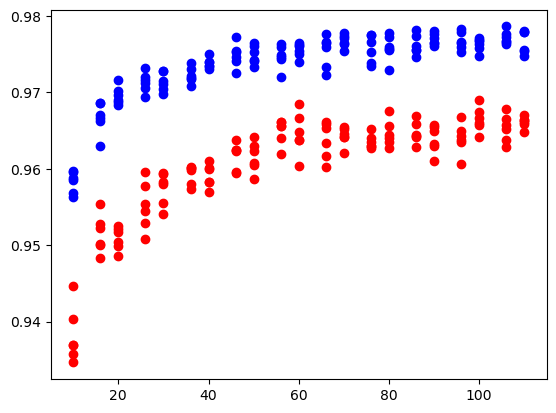

In [26]:
import matplotlib.pyplot as plt

# Extract the data for bigclam and iegam
bigclam_data = acc_dict['bigclam']
iegam_data = acc_dict['iegam']

# Plot the data
for key in bigclam_data.keys():
    for data in bigclam_data[key]:
        plt.plot(key,data,'o', color='blue', label='bigclam', linestyle='none')
for key in iegam_data.keys():
    for data in iegam_data[key]:
        plt.plot(key,data, 'o', color='red', label='iegam', linestyle='none')

# ithink maybe 40 for big and 80 for ie
    
    

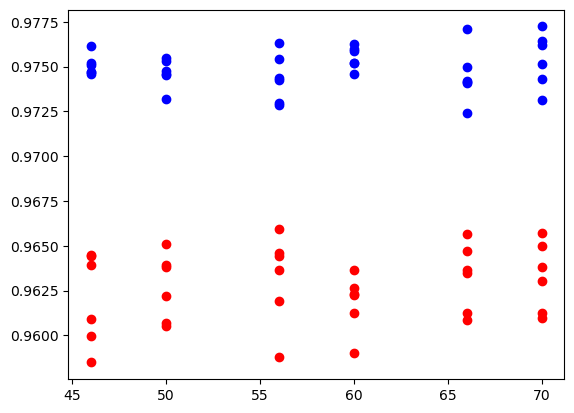

In [38]:
acc_dict
import matplotlib.pyplot as plt

# Extract the data for bigclam and iegam
bigclam_data = acc_dict['bigclam']
iegam_data = acc_dict['iegam']

# Plot the data
for key in bigclam_data.keys():
    plt.plot(dim_feats, bigclam_data[key], 'o', color='blue', label='bigclam', linestyle='none')
    plt.plot(dim_feats, iegam_data[key], 'o', color='red', label='iegam', linestyle='none')
    

# plt.plot(dim_feats, bigclam_data, color='blue', label='bigclam')
# plt.plot(dim_feats, iegam_data, color='red', label='iegam')

# # Add labels and title
# plt.xlabel('Dim Feat')
# plt.ylabel('AUC')
# plt.title('AUC vs Dim Feat')

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()

In [25]:
acc_dict

{'bigclam': {36: [0.9727175209227668, 0.9723776342604988],
  40: [0.972267407076946, 0.9718492448404841],
  50: [0.9763531931124269, 0.9762211485460616]},
 'iegam': {36: [0.9655798708689162, 0.9567564327892888],
  40: [0.9570085710707769, 0.9578119610378143],
  50: [0.9598908052110603, 0.9617079782205947]}}

In [ ]:
#   'bigclam': {
#   10: [0.9585404724760899, 0.9639035086504821],
#   20: [0.9684866796298274, 0.9682561623880347],
#   30: [0.9715515773390894, 0.9679066481381807],
#   40: [0.973401410354128, 0.975028281881877]},
#  'iegam': {
#   10: [0.9363348119751429, 0.9362004879243281],
#   20: [0.953740656284433, 0.9519222289221715],
#   30: [0.9568455111402209, 0.9550952164216329],
#   40: [0.9605243983039492, 0.9610890825556342]}}